# 1. 환경설정

In [109]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
%pwd

'C:\\Users\\User\\kdt'

## 오류발생 (X)

In [111]:
# # 아래에 실습코드를 작성하고 결과를 확인합니다. 약 2분 내외의 시간이 소요됩니다.
# from glob import glob
# file_names = glob("C:/Users/User/kdt/rawdata/subway/*.csv")
# # glob() 함수는 인자로 받은 패턴과 이름이 일치하는 모든 파일과 디렉터리의 리스트를 반환
# # 즉 rawdat에 있는 모든 파일의 이름(*)을 리스트로 불러오는것.
# total = pd.DataFrame()
# file_names

In [112]:
# for file_name in file_names:
#     temp = pd.read_csv(file_name, encoding='cp949',usecols=[0,1,2,3,4])
#     total = pd.concat([total, temp])

## 데이터 일일히 정제 필요

In [113]:
subway2015 = pd.read_csv('rawdata/subway/CARD_SUBWAY_MONTH_2015.csv', sep=",", encoding = "cp949")
subway2016 = pd.read_csv('rawdata/subway/CARD_SUBWAY_MONTH_2016.csv', sep=",", encoding = "cp949")
subway2017 = pd.read_csv('rawdata/subway/CARD_SUBWAY_MONTH_2017.csv', sep=",", encoding = "cp949")
subway2018 = pd.read_csv('rawdata/subway/CARD_SUBWAY_MONTH_2018.csv', sep=",", encoding = "cp949")
subway2019 = pd.read_csv('rawdata/subway/CARD_SUBWAY_MONTH_2019.csv', sep=",", encoding = "cp949")
# subway2020 = pd.read_csv('rawdata/subway/CARD_SUBWAY_MONTH_2020.csv', sep=",", encoding = "cp949")
# subway2021 = pd.read_csv('rawdata/subway/CARD_SUBWAY_MONTH_2021.csv', sep=",", encoding = "cp949")
subway2022 = pd.read_csv('rawdata/subway/CARD_SUBWAY_MONTH_2022.csv', sep=",", encoding = "cp949")

subway_data= subway_data = pd.concat([subway2015, subway2016, subway2017, subway2018, subway2019, subway2022], ignore_index=True)
subway_data.drop(['등록일자'], axis=1,inplace=True)
subway_data.head(3)

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20150101,2호선,낙성대,14586.0,14889.0
1,20150101,2호선,사당,19233.0,20298.0
2,20150101,2호선,방배,5920.0,6065.0


## 2개의 역

In [114]:
## 뭐 타고 내리는 역이 아예 다른가? 같은 개찰구 쓰는거아니였나
subway_data.loc[((subway_data['역명']=='가산디지털단지') & (subway_data['사용일자']==20150101))]

## 일단 맞추는게먼저니까 하기야 하겠다만..

,사용일자,노선명,역명,승차총승객수,하차총승객수
229,20150101,7호선,가산디지털단지,13240.0,11713.0
431,20150101,경부선,가산디지털단지,5350.0,7225.0


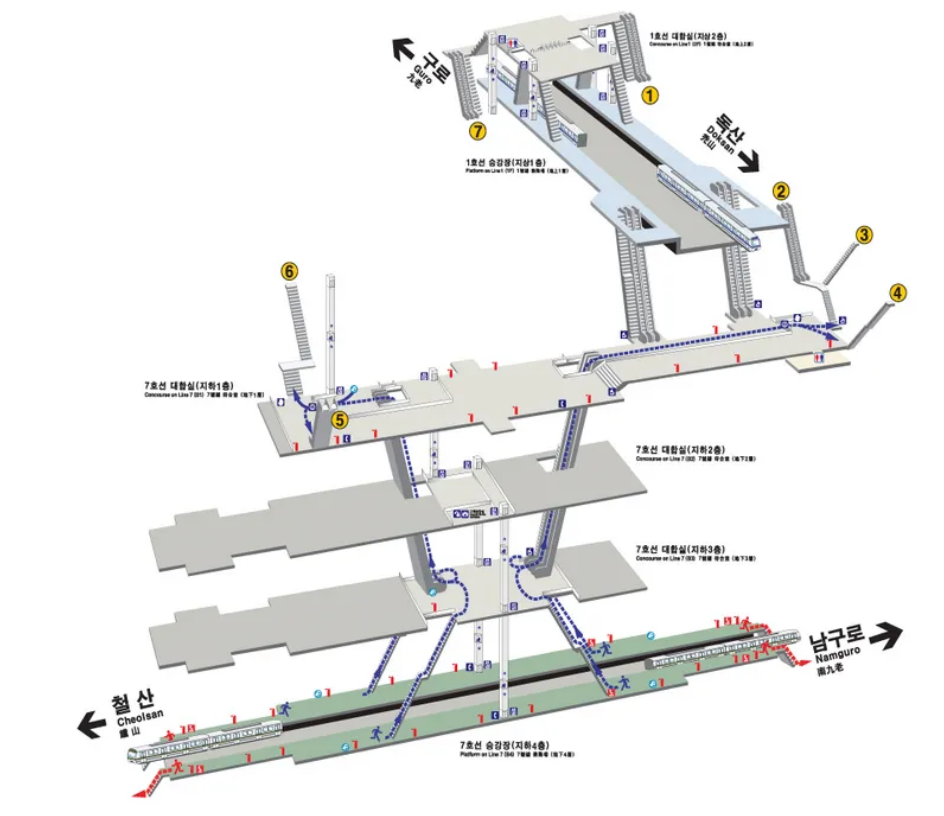

In [115]:
from PIL import Image
file_name='가산디지털단지.png'
img = Image.open(file_name)
img

## 상관계수

In [116]:
print(subway_data[['승차총승객수','하차총승객수']].corr(method='spearman'))
#합쳐도되겠네

          승차총승객수    하차총승객수
승차총승객수  1.000000  0.992149
하차총승객수  0.992149  1.000000


In [117]:
# plt.rc('font', family='Malgun Gothic')
# sns.set(font="Malgun Gothic",            #"NanumGothicCoding", 
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')
# sns.regplot(data=subway_data, x= '승차총승객수', y= '하차총승객수')
# plt.show()

In [118]:
subway_data['승하차총승객수'] = subway_data['승차총승객수'] + subway_data['하차총승객수']
subway_data.drop(['하차총승객수','승차총승객수'], axis=1, inplace=True)
subway_data.head(3)

,사용일자,노선명,역명,승하차총승객수
0,20150101,2호선,낙성대,29475.0
1,20150101,2호선,사당,39531.0
2,20150101,2호선,방배,11985.0


## 데이터 확인

In [119]:
subway_data.isnull().sum()

사용일자       0
노선명        0
역명         0
승하차총승객수    0
dtype: int64

In [120]:
subway_data['사용일자'] = pd.to_datetime(arg = subway_data['사용일자'], format='%Y%m%d')

In [121]:
subway_data.head(3)

,사용일자,노선명,역명,승하차총승객수
0,2015-01-01,2호선,낙성대,29475.0
1,2015-01-01,2호선,사당,39531.0
2,2015-01-01,2호선,방배,11985.0


In [122]:
subway_data['주차'] = subway_data['사용일자'].dt.isocalendar().week

In [123]:
subway_data['요일'] = subway_data['사용일자'].dt.strftime('%w')

In [124]:
subway_data['요일'] = subway_data['요일'].map({
    '0': '일요일',
    '1': '월요일',
    '2': '화요일',
    '3': '수요일',
    '4': '목요일',
    '5': '금요일',
    '6': '토요일'})

In [125]:
subway_data.head(3)

,사용일자,노선명,역명,승하차총승객수,주차,요일
0,2015-01-01,2호선,낙성대,29475.0,1,목요일
1,2015-01-01,2호선,사당,39531.0,1,목요일
2,2015-01-01,2호선,방배,11985.0,1,목요일


In [126]:
subway_data.tail(3)

,사용일자,노선명,역명,승하차총승객수,주차,요일
1259332,2022-12-31,경부선,금천구청,14945.0,52,토요일
1259333,2022-12-31,경부선,가산디지털단지,12878.0,52,토요일
1259334,2022-12-31,경부선,구로,23398.0,52,토요일


In [127]:
subway_data.isnull().sum()

사용일자       0
노선명        0
역명         0
승하차총승객수    0
주차         0
요일         0
dtype: int64

In [128]:
df = subway_data.sort_values(by=['사용일자','역명','주차','요일'])

In [129]:
## 내가 보려는 방향은...
## 세세한 날짜는 중요하지 않다. 날짜가 가르키는 '?'주차 '금요일'을 타겟
## 그렇게되면 2021년 1월 2일이 만약 목요일이라면
## 2020년 1월 4일이 목요일이므로, 서로날짜는다르나, 같은 벡터라고 볼 수 있다. 

In [130]:
##문제 : 서울역(4)는 용산구이지만, 서울역(1)은 중구다
##해결 : 일단 돌려보고, 데이터가 유추를 못하면 호선을 추가하자

In [131]:
df

,사용일자,노선명,역명,승하차총승객수,주차,요일
42,2015-01-01,경원선,가능,7625.0,1,목요일
357,2015-01-01,8호선,가락시장,4866.0,1,목요일
485,2015-01-01,3호선,가락시장,6493.0,1,목요일
229,2015-01-01,7호선,가산디지털단지,24953.0,1,목요일
431,2015-01-01,경부선,가산디지털단지,12575.0,1,목요일
...,...,...,...,...,...,...
1259148,2022-12-31,경원선,회룡,17056.0,52,토요일
1259326,2022-12-31,4호선,회현(남대문시장),39353.0,52,토요일
1259162,2022-12-31,경의선,효창공원앞,3295.0,52,토요일
1259242,2022-12-31,6호선,효창공원앞,7456.0,52,토요일


In [132]:
# gangnam_stations = [('삼성', '2호선'), ('선릉', '2호선'), ('역삼', '2호선'), ('강남', '2호선'),
#                     ('압구정', '3호선'), ('신사', '3호선'), ('매봉', '3호선'), ('도곡', '3호선'), 
#                     ('대치', '학여울'), ('대청', '3호선'), ('일원', '3호선'), ('매봉', '3호선')]


# for station, line in gangnam_stations:
#     df.loc[(df['역명']==station) & (df['노선명']==line), '자치구'] = '강남구'
    
    

In [133]:
df.loc[df['역명'].isin(['삼성', '선릉', '역삼', '강남', '압구정', '신사','매봉','도곡','대치','학여울','대청','일원','수서','청담','강남구청','학동','논현','언주','선정릉','삼성중앙','봉은사']), '자치구'] = '강남구'
df.loc[df['역명'].isin(['천호','강동','길동','굽은다리','명일','고덕','상일동','둔촌동','강일','암사','천호','강동구청','둔촌오륜','중앙보훈병원']),'자치구'] = '강동구'
df.loc[df['역명'].isin(['수유','미아','미아사거리']),'자치구'] = '강북구'
df.loc[df['역명'].isin(['방화','개화산','김포공항','송정','마곡','발산','우장산','화곡','까치산']),'자치구'] = '강서구'
df.loc[df['역명'].isin(['낙성대','서울대입구','봉천','신림']),'자치구'] = '관악구'
df.loc[df['역명'].isin(['건대입구','구의','강변','군자','아차산','광나루','중곡','군자','어린이대공원','건대입구','뚝섬유원지']),'자치구'] = '광진구'
df.loc[df['역명'].isin(['구로디지털단지','대림','신도림','도림천','남구로','천왕','온수']),'자치구'] = '구로구'
df.loc[df['역명'].isin(['가산디지털단지']),'자치구'] = '금천구'
df.loc[df['역명'].isin(['당고개','상계','노원','석계','태릉입구','화랑대','수락산','마들','노원','중계','하계','공릉','태릉입구']),'자치구'] = '노원구'
df.loc[df['역명'].isin(['청동','쌍문','도봉산']),'자치구'] = '도봉구'
df.loc[df['역명'].isin(['신설동','제기동','청량리','용두','신설동','장한평']),'자치구'] = '동대문구'
df.loc[df['역명'].isin(['사당','신대방','동작','이수','사당','남성','숭실대입구','상도','장승배기','심대방삼거리','보라매']),'자치구'] = '동작구'
df.loc[df['역명'].isin(['합정','홍대입구','신촌','이대','아현','마포','공덕','애오개','월드컵경기장','마포구청','망원','합정','상수','광흥창','대흥','공덕']),'자치구'] = '마포구'
df.loc[df['역명'].isin(['충청로','홍제','무악재','독립문','충정로']),'자치구'] = '서대문구'
df.loc[df['역명'].isin(['교대','서초','방배','잠원','고속터미널','교대','남부터미널','양재','남태령','반포','고속터미널','내방']),'자치구'] = '서초구'
df.loc[df['역명'].isin(['상왕십리','왕십리','한양대','뚝섬','성수','용답','신답','금호','옥수','신금호','행당','왕십리','마장','답십리']),'자치구'] = '성동구'
df.loc[df['역명'].isin(['길음','성신여대입구','한성대입구','보문','안암','고려대','월곡','상월곡','돌곶이']),'자치구'] = '성북구'
df.loc[df['역명'].isin(['잠실나루','잠실','잠실새내','종합운동장','가락시장','경찰병원','오금','올림픽공원','방이','오금','개롱','거여','마천','몽촌토성','잠실','석촌','송파','가락시장','문정','장지','복정','종합운동장','삼전','석촌고분','석촌','송파나루','한성백제']),'자치구'] = '송파구'
df.loc[df['역명'].isin(['양천구청','신정네거리','신정','목동','오목교']),'자치구'] = '양천구'
df.loc[df['역명'].isin(['문래','영등포구청','당산','양평','영등포구청','영등포시장','신길','여의도','여의나루','신풍','대림']),'자치구'] = '영등포구'
df.loc[df['역명'].isin(['서울','숙대입구','삼각지','신용산','이촌','효창공원앞','녹사평','이태원','한강진']),'자치구'] = '용산구'
df.loc[df['역명'].isin(['구파발','연신내','불광','녹번','용암','역촌','불광','독바위','연신내','구산','새절','증산','디지털미디어시티']),'자치구'] = '은평구'
df.loc[df['역명'].isin(['종각','종로3가','종로5가','동대문','동묘앞','경복궁','안국','혜화','동대문','서대문','광화문','종로3가','동묘앞','창신']),'자치구'] = '종로구'
df.loc[df['역명'].isin(['서울','시청','을지로입구','을지로3가','을지로4가','동대문역사문화공원','신당','충무로','동대입구','약수','동대문역사문화공원','충무로','명동','회현','을지로4가','동대문역사문화공원','청구','버티고개','약수','청구','신당']),'자치구'] = '중구'
df.loc[df['역명'].isin(['봉화산','신내','먹골','중화','상봉','면목','사가정','용마산']),'자치구'] = '중량구'
######
df.loc[df['역명'].isin(['지축']),'자치구'] = '고양시'
df.loc[df['역명'].isin(['철산','광명사거리']),'자치구'] = '광명시'
df.loc[df['역명'].isin(['남위례','산성','남한산성입구','단대오거리','신흥','수진','모란']),'자치구'] = '성남시'
df.loc[df['역명'].isin(['장암']),'자치구'] = '의정부시'
df.loc[df['역명'].isin(['미사','하남풍산','하남시청','하남검단산']),'자치구'] = '하남시'

# 
df.head(3)

,사용일자,노선명,역명,승하차총승객수,주차,요일,자치구
42,2015-01-01,경원선,가능,7625.0,1,목요일,NaN
357,2015-01-01,8호선,가락시장,4866.0,1,목요일,송파구
485,2015-01-01,3호선,가락시장,6493.0,1,목요일,송파구


In [134]:
df.isnull().sum()

사용일자            0
노선명             0
역명              0
승하차총승객수         0
주차              0
요일              0
자치구        697488
dtype: int64

In [135]:
df = df.dropna(axis=0)

In [136]:
df.isnull().sum()

사용일자       0
노선명        0
역명         0
승하차총승객수    0
주차         0
요일         0
자치구        0
dtype: int64

###

In [137]:
(df['자치구']=='').sum()

0

In [138]:
df = df[df['자치구']!='']
df.head(3)

,사용일자,노선명,역명,승하차총승객수,주차,요일,자치구
357,2015-01-01,8호선,가락시장,4866.0,1,목요일,송파구
485,2015-01-01,3호선,가락시장,6493.0,1,목요일,송파구
229,2015-01-01,7호선,가산디지털단지,24953.0,1,목요일,금천구


In [139]:
(df['자치구']=='').sum()

0

In [140]:
df.shape

(561847, 7)

## target 데이터 생성

In [141]:
start_date = '2022-01-01'
end_date = '2022-12-31'
mask = ((df['사용일자'] >=start_date) & (df['사용일자']<=end_date))
df_target = df.loc[mask]

#2022년 데이터 삭제
df = df.loc[~mask]

In [142]:
df_target.head(3)

,사용일자,노선명,역명,승하차총승객수,주차,요일,자치구
1039977,2022-01-01,8호선,가락시장,5472.0,52,토요일,송파구
1040187,2022-01-01,3호선,가락시장,5503.0,52,토요일,송파구
1039908,2022-01-01,경부선,가산디지털단지,8713.0,52,토요일,금천구


In [143]:
df.tail(3)

,사용일자,노선명,역명,승하차총승객수,주차,요일,자치구
1039412,2019-12-31,5호선,화곡,60996.0,1,화요일,강서구
1039337,2019-12-31,경의선,효창공원앞,6331.0,1,화요일,용산구
1039473,2019-12-31,6호선,효창공원앞,14050.0,1,화요일,용산구


# 2. 데이터 전처리

In [144]:
target='승하차총승객수'
x = df.drop(target, axis=1)
y = df.loc[:, target]
x.drop('사용일자', axis = 1, inplace =True) # 제거하는게 맞음. 이미 주차와 요일이 독립변수임

In [145]:
## 가변수화

In [146]:
cat_cols = ['역명','노선명','요일','자치구']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True).values
x.shape

(471570, 289)

In [147]:
y.shape

(471570,)

In [148]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state=42)

### 파이캐럿

In [149]:
# !pip install --ignore-installed daal==2021.4.0

In [150]:
# !pip install pycaret

In [151]:
import os
import sys
from datetime import datetime
import pickle

from pycaret.datasets import get_data
from pycaret.regression import *

In [152]:

## 주차 요일은 주말에만 영향을 끼친다.
## 사용일자를 빼면 5월5일이 들어가지않는다 (주차, 요일이 영향받는 것이 아니기때문)
## 임시공휴일과 대체휴일은 같이 처리해야하나?
## 발렌타인 넣어도되나?
## 선거는 다 임시공휴일
## 대체휴일은 대체휴일
#2015
holiday_2015 = {'20150101' : '신정', '20150214' : '발렌타인데이', '20150218' : '설날', '20150219' : '설날', '20150220': '설날', '20150301' : '삼일절', '20150314' : '화이트데이', '20150505' : '어린이날', '20150525' : '석가탄신일', '20150606' : '현충일',\
'20150814' : '임시공휴일', '20150815' : '광복절', '20150926' : '추석', '20150927' : '추석', '20150928' : '추석', '20150929' : '대체휴일', '20151003' : '개천절', '20151009' : '한글날', '20151225' : '성탄절' } 
#2016
holiday_2016 = {'20160101' : '신정', '20160214' : '발렌타인데이', '20160207' : '설날', '20160208' : '설날', '20160209': '설날', '20160210': '대체휴일' , '20160301' : '삼일절', '20160314' : '화이트데이','20160413' :'임시공휴일', '20160505' : '어린이날',\
 '20160506' : '임시공휴일', '20160514' : '석가탄신일', '20160606' : '현충일',\
 '20160815' : '광복절', '20160914' : '추석', '20160915' : '추석', '20160916' : '추석', '20161003' : '개천절', '20161009' : '한글날', '20161225' : '성탄절' } 

# #2017
## 개천절 20171003 추석 20171003
holiday_2017 = {'20170101' : '신정', '20170127' : '설날', '20170128' : '설날', '20170129': '설날', '20170130' : '대체휴일', '20170214' : '발렌타인데이',  '20170301' : '삼일절', '20170314' : '화이트데이', '20170503' : '석가탄신일', '20170505' : '어린이날',  '20170606' : '현충일',\
'20170509' : '임시공휴일','20170606' : '현충일', '20170815' : '광복절', '20171002' : '임시공휴일', '20171003' : '개천절' , '20171004': '추석', '201701005' : '추석', '20171006' :'대체휴일',  '20171009' : '한글날', '20171225' : '성탄절' } 

#2018
holiday_2018 = {'20180101' : '신정', '20180214' : '발렌타인데이', '20180215' : '설날', '20180216' : '설날', '20180217': '설날', '20180301' : '삼일절', '20180314' : '화이트데이', '20180505' : '어린이날','20180507':'대체휴일', '20180522' : '석가탄신일', '20180606' : '현충일',\
 '20180613' : '임시공휴일', '20180815' : '광복절', '20180923' : '추석', '20180924' : '추석', '20180925' : '추석', '20180926' : '대체휴일', '20181003' : '개천절', '20181009' : '한글날', '20181225' : '성탄절' } 

#2019
holiday_2019 = {'20190101' : '신정', '20190204' : '설날', '20190205' : '설날', '20190206': '설날', '20190214' : '발렌타인데이', '20190301' : '삼일절', '20190314' : '화이트데이', '20190505' : '어린이날', '20190506' : '대체휴일', '20190512' : '석가탄신일', '20190606' : '현충일',\
 '20190815' : '광복절', '20190912' : '추석', '20190913' : '추석', '20190914' : '추석',  '20191003' : '개천절', '20191009' : '한글날', '20191225' : '성탄절' } 

##2022
holiday_2020 = {'20220101' : '신정', '20220131' : '설날', '20220201' : '설날', '20220202': '설날', '20220214' : '발렌타인데이', '20220301' : '삼일절', '20220309' : '임시공휴일', '20220314' : '화이트데이', '20220505' : '어린이날', '20220509' : '석가탄신일', '20220601' : '임시공휴일',\
 '20220606' : '현충일','20220815' : '광복절', '20220909' : '추석', '20220910' : '추석', '20220911' : '추석',  '20221003' : '개천절', '20221009' : '한글날', '20221010' : '대체휴일', '20221225' : '성탄절' } 


In [153]:
# '사용일자' 열을 datetime 타입으로 변환
df['사용일자'] = pd.to_datetime(df['사용일자'], format='%Y%m%d')

# 공휴일 정보에 따라 '공휴일' 열 추가
df['공휴일'] = df['사용일자'].dt.strftime('%Y%m%d').map(holiday_2015)
df['공휴일'] = df['공휴일'].fillna('')
df.tail()

,사용일자,노선명,역명,승하차총승객수,주차,요일,자치구,공휴일
1039340,2019-12-31,경의선,홍대입구,4940.0,1,화요일,마포구,
1039099,2019-12-31,3호선,홍제,37782.0,1,화요일,서대문구,
1039412,2019-12-31,5호선,화곡,60996.0,1,화요일,강서구,
1039337,2019-12-31,경의선,효창공원앞,6331.0,1,화요일,용산구,
1039473,2019-12-31,6호선,효창공원앞,14050.0,1,화요일,용산구,


In [154]:
df_day = df.loc[:, '사용일자']
df_day

357       2015-01-01
485       2015-01-01
229       2015-01-01
431       2015-01-01
162       2015-01-01
             ...    
1039340   2019-12-31
1039099   2019-12-31
1039412   2019-12-31
1039337   2019-12-31
1039473   2019-12-31
Name: 사용일자, Length: 471570, dtype: datetime64[ns]

In [155]:
df = df.drop('사용일자',axis=1)
df

,노선명,역명,승하차총승객수,주차,요일,자치구,공휴일
357,8호선,가락시장,4866.0,1,목요일,송파구,신정
485,3호선,가락시장,6493.0,1,목요일,송파구,신정
229,7호선,가산디지털단지,24953.0,1,목요일,금천구,신정
431,경부선,가산디지털단지,12575.0,1,목요일,금천구,신정
162,2호선,강남,76949.0,1,목요일,강남구,신정
...,...,...,...,...,...,...,...
1039340,경의선,홍대입구,4940.0,1,화요일,마포구,
1039099,3호선,홍제,37782.0,1,화요일,서대문구,
1039412,5호선,화곡,60996.0,1,화요일,강서구,
1039337,경의선,효창공원앞,6331.0,1,화요일,용산구,


In [156]:
# setup_clf = setup(data=df, target='승하차총승객수')
exp_clf101 = setup(data=df, 
                   target='승하차총승객수', 
                   fold=6,
                   session_id=123)

,Description,Value
0,Session id,123
1,Target,승하차총승객수
2,Target type,Regression
3,Original data shape,"(471570, 7)"
4,Transformed data shape,"(471570, 48)"
5,Transformed train set shape,"(330099, 48)"
6,Transformed test set shape,"(141471, 48)"
7,Numeric features,1
8,Categorical features,5
9,Preprocess,True


In [157]:
best = compare_models(sort='mse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,7177.2347,146526234.8686,12104.3258,0.8391,0.9014,150.0651,23.0967
lightgbm,Light Gradient Boosting Machine,6691.5947,172274334.2468,13124.6818,0.8109,0.8248,75.6171,2.3100
xgboost,Extreme Gradient Boosting,8315.6457,206141989.3333,14353.7586,0.7736,0.8483,66.6215,24.8317
br,Bayesian Ridge,9379.7337,234887338.4845,15325.6508,0.7421,1.0316,171.9809,1.0050
ridge,Ridge Regression,9380.1138,234887424.0289,15325.6536,0.7421,1.0317,171.9742,2.5800
lr,Linear Regression,9380.3927,234887744.9634,15325.6642,0.7421,1.0316,171.9656,5.4533
lasso,Lasso Regression,9376.7906,234905934.7212,15326.2578,0.7421,1.0321,172.1346,24.6867
llar,Lasso Least Angle Regression,9376.7919,234906031.4727,15326.2610,0.7421,1.0321,172.1348,0.7583
et,Extra Trees Regressor,9147.0139,289205277.8806,17004.0221,0.6825,0.5900,9.7317,111.4567
omp,Orthogonal Matching Pursuit,9964.9765,292561598.0574,17104.0473,0.6788,1.0509,185.3160,0.7217


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [158]:
best

GradientBoostingRegressor(random_state=123)

In [159]:
best_tune = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7057.0500,156203326.2365,12498.1329,0.8259,0.8749,103.9521
1,6752.0956,132322751.3011,11503.1627,0.8540,0.8098,87.1225
2,6806.0542,133100771.5003,11536.9308,0.8547,0.8709,103.3958
3,7052.6054,152244282.4917,12338.7310,0.8318,0.8876,86.9602
4,6609.3313,132947684.4682,11530.2942,0.8562,0.8679,121.5243
5,7133.0003,161001043.1853,12688.6186,0.8243,0.8669,106.6574
Mean,6901.6895,144636643.1972,12015.9784,0.8411,0.8630,101.6021
Std,190.3571,12116090.8488,502.8987,0.0140,0.0248,11.9390


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 6 folds for each of 10 candidates, totalling 60 fits


In [160]:
# evaluate_model(best_tune)

In [164]:
predict_model(best_tune)#.sort_values('사용일자',ascending=True).head(15)

## 승하차총 승객수가 적으면 예측하지 못한다.
## 특정 값 미만이면 행을 쳐내도 될듯

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,4358.9542,46586007.2005,6825.3943,0.9490,0.7764,48.8133


,노선명,역명,주차,요일,자치구,공휴일,승하차총승객수,prediction_label
654082,1호선,종각,11,금요일,종로구,,108338.0,109635.225147
175602,3호선,충무로,47,수요일,중구,,6.0,13675.385599
321758,5호선,신길,32,화요일,영등포구,,7109.0,7343.054007
534606,3호선,동대입구,34,월요일,중구,,20035.0,27803.712385
978252,3호선,을지로3가,38,목요일,중구,,27697.0,26080.534541
...,...,...,...,...,...,...,...,...
790196,5호선,개화산,44,일요일,강서구,,7187.0,9293.431813
1010910,중앙선,양평,46,수요일,영등포구,,7950.0,6196.350133
207262,5호선,여의도,2,금요일,영등포구,,60717.0,52456.398502
981537,7호선,뚝섬유원지,39,화요일,광진구,,23488.0,22645.577337
